In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Constant
mu0 = 4 * np.pi * 1e-7   # T·m/A

# Coil parameters (SI units)
R = 0.015   # meters
s = 0.02    # meters
N = 100

def calc_B(I_mA):
    """
    Input:
        I_mA : current in milliAmps
    Output:
        Magnetic field in nanoTesla
    """
    I_A = I_mA * 1e-3        # Convert mA → A
    
    B_T = (mu0 * N * I_A * R**2) / ((R**2 + (s/2)**2)**(3/2))
    
    B_nT = B_T * 1e9         # Convert T → nT
    return B_nT

#Theoretical Slope
k_SI = (mu0 * N * R**2) / ((R**2 + (s/2)**2)**(3/2))
k_th = k_SI * 1e6 # nT per mA

# Example
B = calc_B(0.01)
print("Magnetic Field $B_z$ (nT):", B)


Magnetic Field $B_z$ (nT): 48.25778016201222


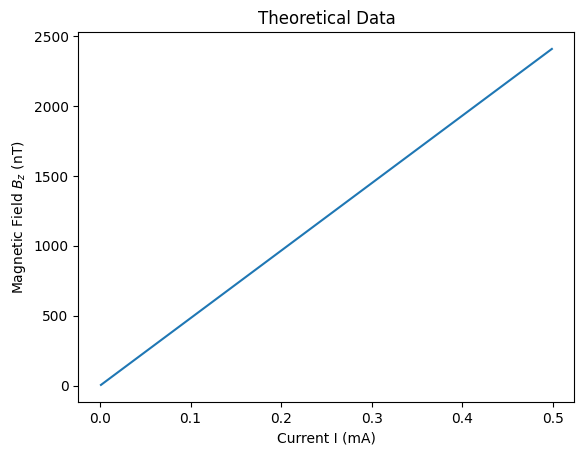

In [4]:
I_mult = np.arange(0.001,0.5,0.001) #mA
B_mult = calc_B(I_mult)

plt.plot(I_mult, B_mult)
plt.title("Theoretical Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()

In [5]:
df_t = pd.DataFrame([I_mult, B_mult]).T
df_t.columns = ["current", "field"]
df_t


,current,field
0,0.001,4.825778
1,0.002,9.651556
2,0.003,14.477334
3,0.004,19.303112
4,0.005,24.128890
...,...,...
494,0.495,2388.760118
495,0.496,2393.585896
496,0.497,2398.411674
497,0.498,2403.237452


In [6]:
# mod_z (mA)
# amplitude (mV/sqrt(Hz))
# signal (V)
df = pd.read_csv('magnetometer_data.csv')

In [7]:
df['signal_amplitude'] = df['signal_ceil']-df['signal_floor'] 
df

,mod_z,amplitude,signal_floor,signal_ceil,signal_amplitude
0,0.500,230.0,2.30,3.000,0.700
1,0.500,230.0,1.20,1.800,0.600
2,0.100,50.0,1.50,1.600,0.100
3,0.050,23.0,2.60,2.650,0.050
4,0.010,5.0,2.60,2.625,0.025
5,0.020,11.5,2.55,2.575,0.025
6,0.030,17.0,2.50,2.540,0.040
7,0.040,18.0,1.80,1.850,0.050
8,0.050,25.0,2.30,2.350,0.050
9,0.075,40.0,2.20,2.300,0.100


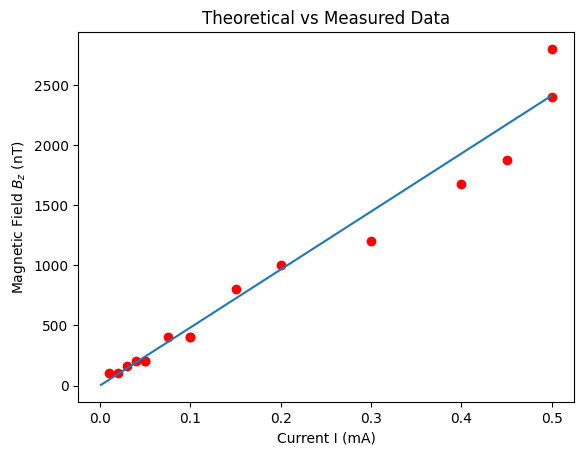

In [8]:
# Factor from signal_amplitude to magnetic field
estimated_factor = 4e3


plt.plot(I_mult, B_mult)
plt.scatter(df['mod_z'], df['signal_amplitude']*estimated_factor, color='red')
plt.title("Theoretical vs Measured Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()


Slope (m): [1.18856494]
Intercept (b): [-0.00349879]
Factor: 4060.1719344933417


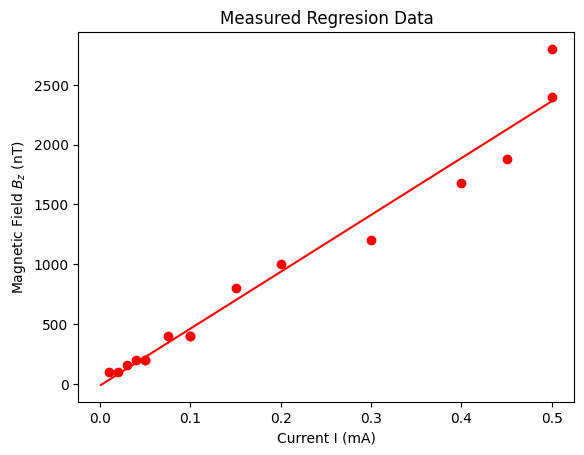

In [9]:
X = np.array(df["mod_z"]).reshape(-1, 1)
Y = np.array(df["signal_amplitude"]).reshape(-1, 1)
lnr = LinearRegression()
lnr.fit(X,Y)
# Results
calculated_factor = k_th/lnr.coef_[0][0]

print("Slope (m):", lnr.coef_[0])
print("Intercept (b):", lnr.intercept_)
print("Factor:", calculated_factor)

y_pred = lnr.predict(I_mult.reshape(-1,1))

plt.scatter(df['mod_z'], df['signal_amplitude']*estimated_factor, color='red')
plt.plot(I_mult, y_pred*estimated_factor, color='red')
plt.title("Measured Regresion Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()



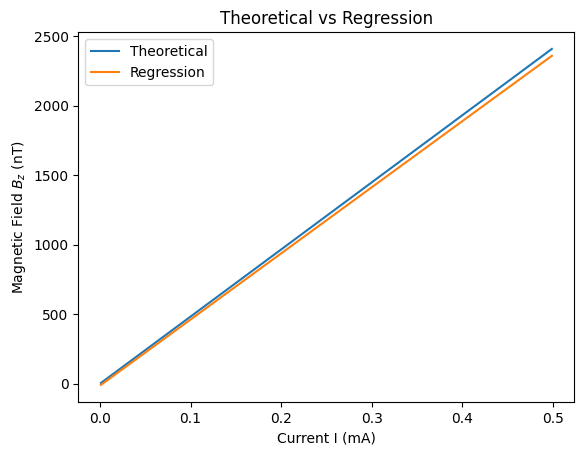

In [10]:
plt.plot(I_mult, B_mult, label='Theoretical')
plt.plot(I_mult, y_pred*estimated_factor, label='Regression')
plt.title("Theoretical vs Regression")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.legend()
plt.show()


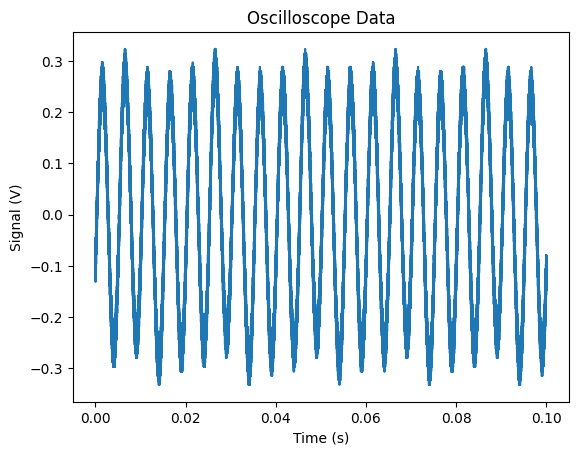

In [11]:
data_2 = pd.read_csv("Rigol_045.csv")
data_2["Time(s)"] = data_2["Time(s)"] + np.abs(data_2["Time(s)"].min()+1e-10)
data_2["Frequency(Hz)"] = 1/ data_2["Time(s)"]

plt.plot(data_2["Time(s)"], data_2["CH1(V)"])
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.show()

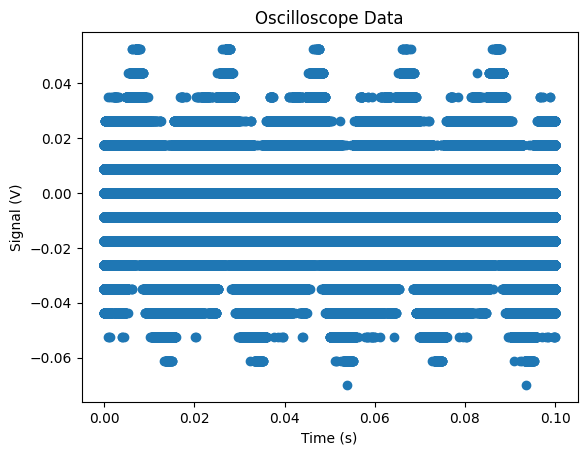

In [12]:
data_2 = pd.read_csv("RigolDS001.csv")
data_2["Time(s)"] = data_2["Time(s)"] + np.abs(data_2["Time(s)"].min()+1e-10)
data_2["Frequency(Hz)"] = 1/ data_2["Time(s)"]

plt.scatter(data_2["Time(s)"], data_2["CH1(V)"])
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.show()

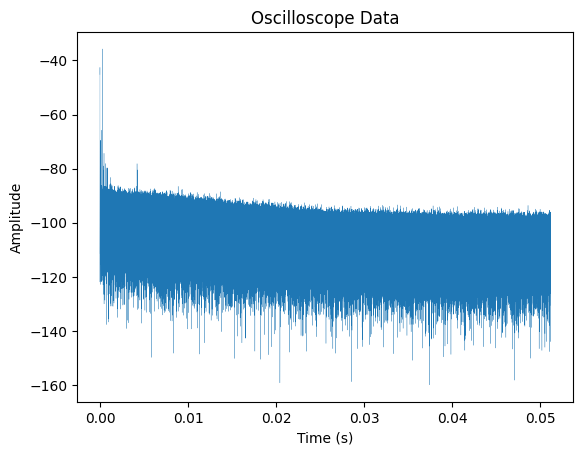

In [13]:
plt.plot(data_2["Time(s)"], data_2["MATH1(dBV)"], linewidth=0.2)
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

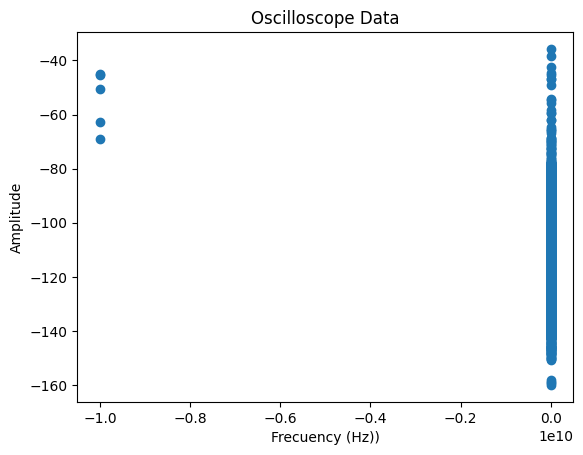

In [14]:
plt.scatter(data_2["Frequency(Hz)"], data_2["MATH1(dBV)"])
plt.title("Oscilloscope Data")
plt.xlabel("Frecuency (Hz))")
plt.ylabel("Amplitude")
plt.show()

In [15]:
np.linspace(0.01, 0.5, 10)
np.linspace(0.001, 0.01, 5)

array([0.001  , 0.00325, 0.0055 , 0.00775, 0.01   ])

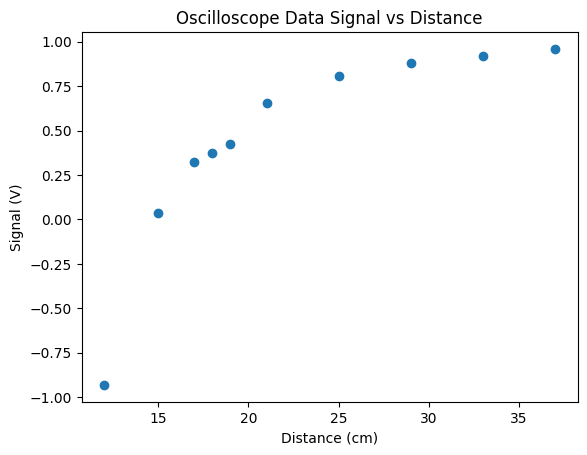

In [16]:
filenames = [12,15,17,18,19,21,25,29,33,37]
means = []
for i in filenames:
    data_t = pd.read_csv(f"im/RigolDSim{i}.csv")
    means.append(data_t["CH1(V)"].mean())

plt.scatter(filenames, means)
plt.title("Oscilloscope Data Signal vs Distance")
plt.xlabel("Distance (cm)")
plt.ylabel("Signal (V)")
# plt.yscale('log')
plt.show()

In [57]:
def bz_ring_on_axis(z_m, z0_m, L_m, Ri_m, Ro_m, Br_T):
    """
    Campo Bz (Tesla) en el eje de un imán anillo magnetizado axialmente.
    z_m  : posición del punto (m) en el eje
    z0_m : posición (m) de la cara inferior del imán
    L_m  : espesor del imán (m)
    Ri_m : radio interior (m)
    Ro_m : radio exterior (m)
    Br_T : remanencia (T), típico N52 ~ 1.42–1.48 T (usa el dato del vendedor si lo tienes)
    """
    # z relativo medido desde la cara inferior del imán
    z = z_m - z0_m

    def g(R):
        return (z + L_m) / np.sqrt((z + L_m)**2 + R**2) - z / np.sqrt(z**2 + R**2)

    return 0.5 * Br_T * (g(Ro_m) - g(Ri_m))


def bz_stack_10_rings(distance_cm,
                      n_magnets=10,
                      gap_mm=0.5,
                      Br_T=1.45,
                      ID_mm=20.0,
                      OD_mm=25.0,
                      thickness_mm=3.0,
                      z_reference="top"):
    """
    Campo total Bz (nT) sobre el eje de un stack de anillos.

    distance_cm: distancia desde la referencia elegida (cm)
    z_reference: "top" = distancia medida desde la cara superior del stack (hacia fuera)
                 "bottom" = desde la cara inferior del stack
                 "center" = desde el centro geométrico del stack
    """
    # Geometría (m)
    Ri = (ID_mm / 2) * 1e-3
    Ro = (OD_mm / 2) * 1e-3
    L  = thickness_mm * 1e-3
    gap = gap_mm * 1e-3

    pitch = L + gap  # separación entre caras inferiores consecutivas
    total_height = n_magnets * L + (n_magnets - 1) * gap

    # Coordenada del punto (m) según referencia
    d = distance_cm * 1e-2  # cm -> m
    if z_reference == "top":
        # z=0 en la cara superior del stack; el punto está por encima => z = total_height + d
        z_point = total_height + d
        z0_first = 0.0
    elif z_reference == "bottom":
        # z=0 en la cara inferior del stack; punto por encima => z = d
        z_point = d
        z0_first = 0.0
    elif z_reference == "center":
        # z=0 en el centro del stack; punto por encima => z = total_height/2 + d
        z_point = total_height / 2 + d
        z0_first = -total_height / 2
        print(z0_first)
    else:
        raise ValueError("z_reference debe ser: 'top', 'bottom' o 'center'")

    # Suma de contribuciones
    B_total_T = 0.0
    for i in range(n_magnets):
        z0_i = z0_first + i * pitch  # cara inferior del imán i
        B_total_T += bz_ring_on_axis(z_point, z0_i, L, Ri, Ro, Br_T)

    # Tesla -> nT
    return B_total_T * 1e9


if __name__ == "__main__":
    # Ejemplo: campo a 2 cm por encima de la cara superior del stack
    B_nT = bz_stack_10_rings(distance_cm=2.0,
                             n_magnets=10,
                             gap_mm=0.5,     # ajusta al grosor real del anillo plástico
                             Br_T=1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="top")
    print(f"Bz ≈ {B_nT:,.0f} nT")


Bz ≈ 19,295,963 nT


-0.0015


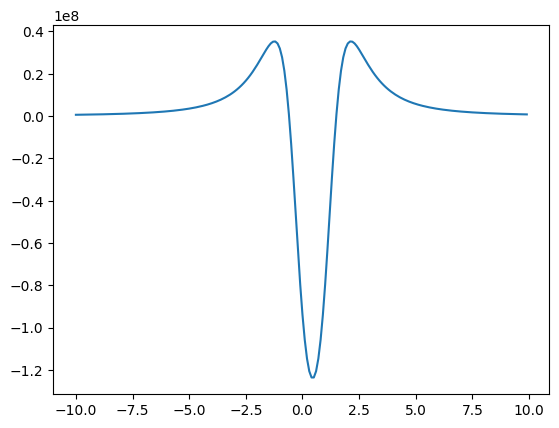

In [ ]:
np.format_float_scientific(bz_stack_10_rings(distance_cm=0,
                             n_magnets=1,
                             gap_mm=0,     # ajusta al grosor real del anillo plástico
                             Br_T=1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="center"), 3)

X = np.arange(-10,10,0.1)
plt.plot(X, bz_stack_10_rings(distance_cm=np.array(X),
                             n_magnets=5,
                             gap_mm=0,     # ajusta al grosor real del anillo plástico
                             Br_T=1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="bottom"))

plt.show()

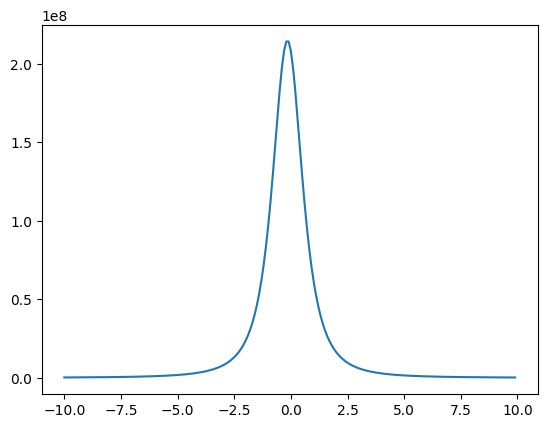

0.8881950685602856


In [75]:
def bz_cylinder_on_axis(z_m, z0_m, L_m, R_m, Br_T):
    """
    Campo Bz (Tesla) en el eje de un imán cilíndrico macizo
    con magnetización axial uniforme.

    z_m  : posición del punto (m)
    z0_m : posición de la cara inferior del imán (m)
    L_m  : espesor del imán (m)
    R_m  : radio del cilindro (m)
    Br_T : remanencia (T)
    """

    # coordenada relativa al imán
    z = z_m - z0_m

    Bz = 0.5 * Br_T * (
        (z + L_m) / np.sqrt((z + L_m)**2 + R_m**2)
        - z / np.sqrt(z**2 + R_m**2)
    )

    return Bz

def bz_stack_10_rings(distance_cm,
                      n_magnets=10,
                      gap_mm=0.5,
                      Br_T=1.45,
                      ID_mm=20.0,
                      OD_mm=25.0,
                      thickness_mm=3.0,
                      z_reference="top"):
    """
    Campo total Bz (nT) sobre el eje de un stack de anillos.

    distance_cm: distancia desde la referencia elegida (cm)
    z_reference: "top" = distancia medida desde la cara superior del stack (hacia fuera)
                 "bottom" = desde la cara inferior del stack
                 "center" = desde el centro geométrico del stack
    """
    # Geometría (m)
    Ri = (ID_mm / 2) * 1e-3
    Ro = (OD_mm / 2) * 1e-3
    L  = thickness_mm * 1e-3
    gap = gap_mm * 1e-3

    pitch = L + gap  # separación entre caras inferiores consecutivas
    total_height = n_magnets * L + (n_magnets - 1) * gap

    # Coordenada del punto (m) según referencia
    d = distance_cm * 1e-2  # cm -> m
    if z_reference == "top":
        # z=0 en la cara superior del stack; el punto está por encima => z = total_height + d
        z_point = total_height + d
        z0_first = 0.0
    elif z_reference == "bottom":
        # z=0 en la cara inferior del stack; punto por encima => z = d
        z_point = d
        z0_first = 0.0
    elif z_reference == "center":
        # z=0 en el centro del stack; punto por encima => z = total_height/2 + d
        z_point = total_height / 2 + d
        z0_first = -total_height / 2
        print(z0_first)
    else:
        raise ValueError("z_reference debe ser: 'top', 'bottom' o 'center'")

    # Suma de contribuciones
    B_total_T = 0.0
    for i in range(n_magnets):
        z0_i = z0_first + i * pitch  # cara inferior del imán i
        B_total_T += bz_cylinder_on_axis(z_point, z0_i, L, Ri, Br_T)

    # Tesla -> nT
    return B_total_T * 1e9

X = np.arange(-10,10,0.1)
plt.plot(X, bz_stack_10_rings(distance_cm=np.array(X),
                            n_magnets=1,
                             gap_mm=0,     # ajusta al grosor real del anillo plástico
                             Br_T=1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="bottom"))

plt.show()

print(bz_stack_10_rings(distance_cm=0,
                            n_magnets=10,
                             gap_mm=0,     # ajusta al grosor real del anillo plástico
                             Br_T=1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="bottom")*1e-9)

# Exp

In [76]:
import numpy as np
from scipy.optimize import curve_fit

def calibrate_linear(dist_cm, volt, **model_kwargs):
    """
    dist_cm: array de distancias (cm)
    volt: array de voltajes medidos (V)
    model_kwargs: parámetros del modelo (gap_mm, Br_T, etc.)
    """
    dist_cm = np.asarray(dist_cm, dtype=float)
    volt = np.asarray(volt, dtype=float)

    # Campo teórico en nT para cada distancia
    B_nT = np.array([bz_stack_10_rings(d, **model_kwargs) for d in dist_cm])

    # Modelo lineal V = a*B + b
    def V_model(B, a, b):
        return a * B + b

    (a, b), cov = curve_fit(V_model, B_nT, volt)
    a_err, b_err = np.sqrt(np.diag(cov))

    return {
        "a_V_per_nT": a,
        "b_V": b,
        "a_err": a_err,
        "b_err": b_err
    }

# Ejemplo de uso:
dist_cm = [0.5, 1, 1.5, 2, 3, 4]   # tus datos
volt =    [1.23, 0.98, 0.80, ...]  # tus datos
res = calibrate_linear(filenames, means, n_magnets=10, gap_mm=0.5, Br_T=-1.45,
                       ID_mm=20, OD_mm=25, thickness_mm=3, z_reference="top")
print(res)
# Luego conviertes mediciones: B_est(nT) = (V - b)/a


{'a_V_per_nT': np.float64(2.4279695868823045e-06), 'b_V': np.float64(1.0605616468672279), 'a_err': np.float64(5.664700074393954e-08), 'b_err': np.float64(0.019117828559881835)}


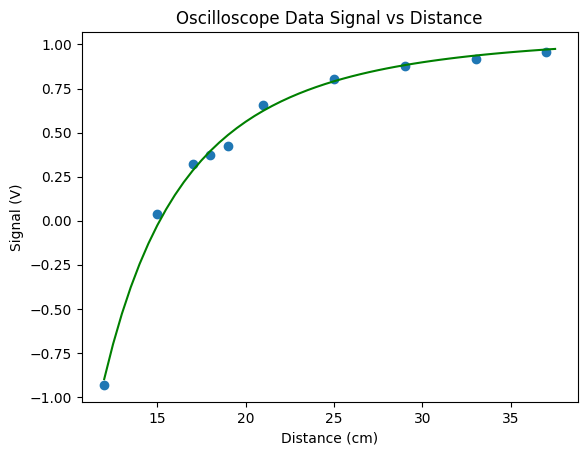

In [78]:
distances = np.arange(12,38,0.5) 
theoretical_Bz = bz_stack_10_rings(distance_cm=distances,
                             n_magnets=10,
                             gap_mm=0.5,     # ajusta al grosor real del anillo plástico
                             Br_T=-1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="top")

plt.scatter(filenames, means)
plt.plot(distances, theoretical_Bz *res['a_V_per_nT'] + res['b_V'], color="green")
plt.title("Oscilloscope Data Signal vs Distance")
plt.xlabel("Distance (cm)")
plt.ylabel("Signal (V)")
# plt.yscale('log')
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_41812/2854151573.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Magnetic Field ($\mu$T)")


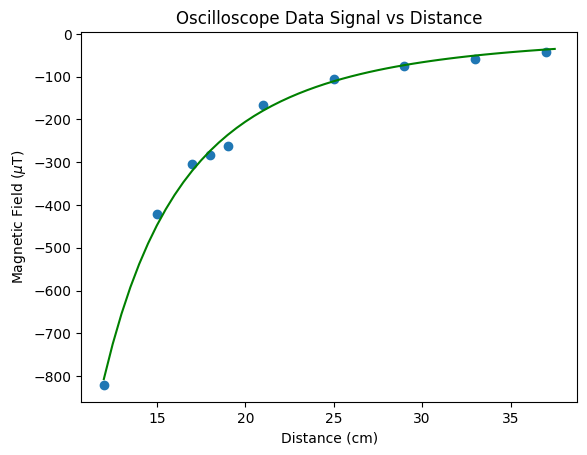

In [79]:
distances = np.arange(12,38,0.5) 
theoretical_Bz = bz_stack_10_rings(distance_cm=distances,
                             n_magnets=10,
                             gap_mm=0.5,     # ajusta al grosor real del anillo plástico
                             Br_T=-1.45,      # ajusta si tienes el Br exacto del fabricante
                             ID_mm=20.0,
                             OD_mm=25.0,
                             thickness_mm=3.0,
                             z_reference="top")

plt.scatter(filenames, (np.array(means)-res['b_V'])/res['a_V_per_nT'] *1e-3)
plt.plot(distances, theoretical_Bz*1e-3, color="green")
plt.title("Oscilloscope Data Signal vs Distance")
plt.xlabel("Distance (cm)")
plt.ylabel("Magnetic Field ($\mu$T)")
# plt.yscale('log')
plt.show()

In [ ]:
gyro=7 #Hz/nT
larmor=10000 *2*np.pi #Hz
B=larmor/gyro

print(B)

#de calc data, B es 50 nt por 0.01 mA, provamos con 1 mA

8975.979010256551


hemos hecho dos medidas de B para larmor frequency, una medida es 2 mA(guardado como 1) y la otra 4 mA (de offset). observamos bien larmor frequency. lo hemos hecho apagando el laser del pump y con la funcion trigger del osciloscopio. itentamos hacerlo tapando el laser con un papel, pero somos muy lentos poniendo el paper(deberia ser mar rapido que un ms). 
hacer un feat sinusoidal del decay en estos (amplitud y frecuencia). Medir larmor frequency con los datos
tambien probamos con modulacion de 2 mA y 5 kHz
con pump estan atomos polarizados con campo perpendicular a este, al parar pump vemos como se relajan..polarizacion cero (free induction decay)
tambien hemos intendado con el iman, dberiamos ver mas frecuencia al tener campo magnetico muy grande pero no?

mirar como varia el pico variando intensidad y potencia(con lambda) del laseer del probe